<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/deep_learning/106/model_checkpoint_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -qq https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/model-checkpoint-tensorflow/model-checkpoint-tensorflow.zip
!unzip -qq model-checkpoint-tensorflow.zip
%cd model-checkpoint-tensorflow

/content/model-checkpoint-tensorflow


In [8]:
import argparse
import os

from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
import matplotlib.pyplot as plt

from pyimagesearch.nn.conv import MiniVGGNet

In [3]:
def plt_imshow(title, image):
    # convert from BGR to RBG and display image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RBG)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [4]:
args = {
    "weights": "weights/improvements"
}

In [5]:
# load data and scale to [0, 1]
print("[INFO] loading CIFAR-10 data...")
((train_x, train_y), (test_x, test_y)) = cifar10.load_data()
train_x = train_x.astype("float") / 255.0
test_x = test_x.astype("float") / 255.0

# convert labels from integers to vectors
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)


[INFO] loading CIFAR-10 data...
170498071/170498071 [==============================] - 3s 0us/step


In [10]:
# init optimizer and model
print("[INFO] compiling model...")
lr = 0.01
NUM_EPOCHS = 40
lr_schedule = ExponentialDecay(
    initial_learning_rate=lr,
    decay_steps=10000,
    decay_rate=0.96
)
opt = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)

[INFO] compiling model...


In [11]:
# construct the callback to save only the *best* model to disk
# based on validation loss
checkpoint = ModelCheckpoint(
    args["weights"], 
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)
callbacks = [checkpoint]

In [12]:
# train network
print("[INFO] training network...")
H = model.fit(
    train_x,
    train_y,
    validation_data=(test_x, test_y),
    batch_size=64,
    epochs=NUM_EPOCHS,
    callbacks=callbacks,
    verbose=2
)

[INFO] training network...
Epoch 1/40

Epoch 1: val_loss improved from inf to 1.32795, saving model to weights/improvements


782/782 - 23s - loss: 1.6733 - accuracy: 0.4442 - val_loss: 1.3279 - val_accuracy: 0.5270 - 23s/epoch - 30ms/step
Epoch 2/40

Epoch 2: val_loss improved from 1.32795 to 0.98891, saving model to weights/improvements


782/782 - 11s - loss: 1.2192 - accuracy: 0.5777 - val_loss: 0.9889 - val_accuracy: 0.6523 - 11s/epoch - 14ms/step
Epoch 3/40

Epoch 3: val_loss did not improve from 0.98891
782/782 - 8s - loss: 1.0201 - accuracy: 0.6475 - val_loss: 1.0568 - val_accuracy: 0.6417 - 8s/epoch - 10ms/step
Epoch 4/40

Epoch 4: val_loss improved from 0.98891 to 0.89252, saving model to weights/improvements


782/782 - 10s - loss: 0.9042 - accuracy: 0.6839 - val_loss: 0.8925 - val_accuracy: 0.6798 - 10s/epoch - 13ms/step
Epoch 5/40

Epoch 5: val_loss improved from 0.89252 to 0.75581, saving model to weights/improvements


782/782 - 12s - loss: 0.8142 - accuracy: 0.7182 - val_loss: 0.7558 - val_accuracy: 0.7366 - 12s/epoch - 15ms/step
Epoch 6/40

Epoch 6: val_loss did not improve from 0.75581
782/782 - 8s - loss: 0.7473 - accuracy: 0.7376 - val_loss: 0.7579 - val_accuracy: 0.7455 - 8s/epoch - 10ms/step
Epoch 7/40

Epoch 7: val_loss did not improve from 0.75581
782/782 - 8s - loss: 0.6942 - accuracy: 0.7569 - val_loss: 0.8745 - val_accuracy: 0.7101 - 8s/epoch - 10ms/step
Epoch 8/40

Epoch 8: val_loss improved from 0.75581 to 0.72124, saving model to weights/improvements


782/782 - 10s - loss: 0.6535 - accuracy: 0.7704 - val_loss: 0.7212 - val_accuracy: 0.7528 - 10s/epoch - 13ms/step
Epoch 9/40

Epoch 9: val_loss improved from 0.72124 to 0.62879, saving model to weights/improvements


782/782 - 11s - loss: 0.6030 - accuracy: 0.7885 - val_loss: 0.6288 - val_accuracy: 0.7876 - 11s/epoch - 14ms/step
Epoch 10/40

Epoch 10: val_loss did not improve from 0.62879
782/782 - 8s - loss: 0.5662 - accuracy: 0.8005 - val_loss: 0.6397 - val_accuracy: 0.7835 - 8s/epoch - 11ms/step
Epoch 11/40

Epoch 11: val_loss improved from 0.62879 to 0.60501, saving model to weights/improvements


782/782 - 11s - loss: 0.5307 - accuracy: 0.8138 - val_loss: 0.6050 - val_accuracy: 0.7954 - 11s/epoch - 14ms/step
Epoch 12/40

Epoch 12: val_loss did not improve from 0.60501
782/782 - 9s - loss: 0.5013 - accuracy: 0.8231 - val_loss: 0.6725 - val_accuracy: 0.7735 - 9s/epoch - 11ms/step
Epoch 13/40

Epoch 13: val_loss did not improve from 0.60501
782/782 - 8s - loss: 0.4821 - accuracy: 0.8316 - val_loss: 0.6392 - val_accuracy: 0.7931 - 8s/epoch - 10ms/step
Epoch 14/40

Epoch 14: val_loss did not improve from 0.60501
782/782 - 8s - loss: 0.4500 - accuracy: 0.8424 - val_loss: 0.6501 - val_accuracy: 0.7879 - 8s/epoch - 10ms/step
Epoch 15/40

Epoch 15: val_loss did not improve from 0.60501
782/782 - 8s - loss: 0.4271 - accuracy: 0.8496 - val_loss: 0.6655 - val_accuracy: 0.7814 - 8s/epoch - 10ms/step
Epoch 16/40

Epoch 16: val_loss did not improve from 0.60501
782/782 - 8s - loss: 0.4035 - accuracy: 0.8547 - val_loss: 0.6371 - val_accuracy: 0.7971 - 8s/epoch - 10ms/step
Epoch 17/40

Epoch 17

782/782 - 11s - loss: 0.3343 - accuracy: 0.8796 - val_loss: 0.5922 - val_accuracy: 0.8122 - 11s/epoch - 14ms/step
Epoch 21/40

Epoch 21: val_loss improved from 0.59219 to 0.58888, saving model to weights/improvements


782/782 - 10s - loss: 0.3169 - accuracy: 0.8866 - val_loss: 0.5889 - val_accuracy: 0.8104 - 10s/epoch - 13ms/step
Epoch 22/40

Epoch 22: val_loss did not improve from 0.58888
782/782 - 8s - loss: 0.3066 - accuracy: 0.8908 - val_loss: 0.6253 - val_accuracy: 0.8053 - 8s/epoch - 11ms/step
Epoch 23/40

Epoch 23: val_loss improved from 0.58888 to 0.56335, saving model to weights/improvements


782/782 - 11s - loss: 0.2952 - accuracy: 0.8948 - val_loss: 0.5633 - val_accuracy: 0.8190 - 11s/epoch - 14ms/step
Epoch 24/40

Epoch 24: val_loss did not improve from 0.56335
782/782 - 8s - loss: 0.2800 - accuracy: 0.8997 - val_loss: 0.5931 - val_accuracy: 0.8205 - 8s/epoch - 10ms/step
Epoch 25/40

Epoch 25: val_loss did not improve from 0.56335
782/782 - 8s - loss: 0.2731 - accuracy: 0.9022 - val_loss: 0.6054 - val_accuracy: 0.8138 - 8s/epoch - 10ms/step
Epoch 26/40

Epoch 26: val_loss did not improve from 0.56335
782/782 - 9s - loss: 0.2565 - accuracy: 0.9094 - val_loss: 0.6064 - val_accuracy: 0.8149 - 9s/epoch - 11ms/step
Epoch 27/40

Epoch 27: val_loss did not improve from 0.56335
782/782 - 8s - loss: 0.2530 - accuracy: 0.9096 - val_loss: 0.6061 - val_accuracy: 0.8148 - 8s/epoch - 10ms/step
Epoch 28/40

Epoch 28: val_loss did not improve from 0.56335
782/782 - 8s - loss: 0.2372 - accuracy: 0.9151 - val_loss: 0.6156 - val_accuracy: 0.8146 - 8s/epoch - 10ms/step
Epoch 29/40

Epoch 29

In [17]:
def display_learning_curves(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs_range = range(NUM_EPOCHS)

    fig = plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label="train accuracy")
    plt.plot(epochs_range, val_acc, label="validation accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label="train loss")
    plt.plot(epochs_range, val_loss, label="validation loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

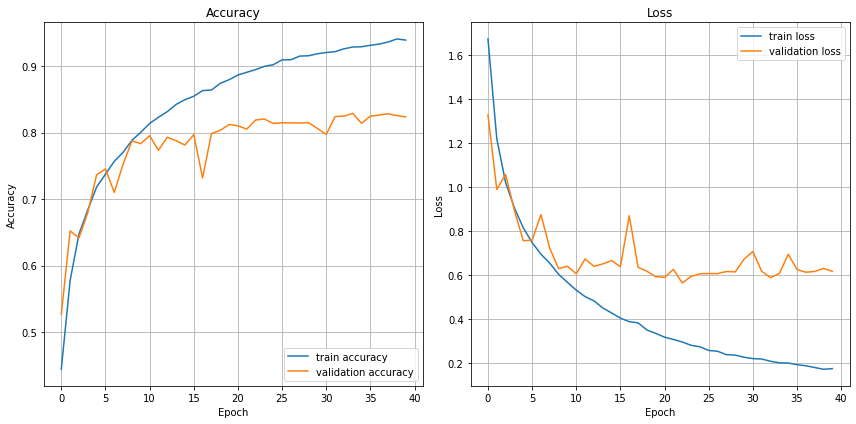

In [18]:
display_learning_curves(H)